## Introduction 

This is a repository that contains my code submission for the **`UmojaHack Africa 2022: Monthly Insurance Claim Prediction Challenge (INTERMEDIATE)`**.

Short-term insurance claims are one of the largest costs in the insurance industry, and are extremely difficult to forecast. Zimnat Insurance wants to predict the value of future claims per client, in order to better forecast annual costs.

The objective of this challenge is to create a machine learning model to predict how much a client will claim from Zimnat per month for a whole year.

The solution will aid [Zimnat](https://www.zimnat.co.zw/) in being better prepared to address claims that are submitted, and improve customer satisfaction by alerting clients to possible claims they will make in the future.

## Packages and libraries used:

|S/N|Package|Use case|
|---|-------|--------|
|1.|`Scikit-learn`|Machine Learning package|
|2.|`Numpy`|Numeric compuation|
|3.|`Pandas`|Dataframe manipulation|
|4.|`Matplotlib` and `Seaborn`|Visualisation|
|5.|`Scipy`|Scientific computation|

Code was written and compiled in `Jupyter Notebook`

## Datasets
Description to the dataset can be found [here](https://zindi.africa/competitions/umojahack-africa-2022-intermediate-challenge/data)


## Approach

I employed the use of a simple `ensemble` method of `ExtraTreesRegressor` of 65 trees to fit the data with the following hyperparameters:
* `max_depth=3`
* `criterion='mae'`
* `n_estimators=65`
* `n_jobs=-1`
* `min_samples_leaf=3`
* `min_samples_split=5` 

The data features with variance value lower than `0.9` were removed. That is,
$$ var_{x} = (1-x)\times{x}$$
$$ x = threshold = 0.9$$
The numeric values were scaled using the `z-score` normaization and the categorical features were `one-hot`encoded. Feature engineering technique was also employed.

## Model Result
<img src='./model.png'>

A training mean-squared-error of $\approx32341$ was attained. While the test MAE is $\approx32543$. This high error is due to the untreated outlier values that the model was fitted on. 

## Suggestion
This code is in no way the best approach. However, these are my suggestions:
1. Add more data. The more the data, the more patterns are detected
2. Treat oulier values in the `target` column
3. Feature engineering
4. Boosting of ensemble methods because number of observations is > than 1000

## Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
import pandas as pd
import numpy as np

filterwarnings('ignore')

## 1. Data Loading 

In [2]:
# Load files
train_data = pd.read_csv('train.csv')
policies = pd.read_csv('policies.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train_data.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [3]:
#preview policies
policies.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [4]:
#samplesubmission data
sample_submission.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,0
1,ID_GTE9ZUJ9GZ97,0
2,ID_RUVIYRKWZ4RG,0
3,ID_J81X8SWU6JYN,0
4,ID_94NM3JJAWWOQ,0


In [5]:
#preview test data
test_data.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.0,prod00005,ag00068,cob00009,rt00032,2021-03-11,ct0003,rf0001,pc0007,sc00029,br00004
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.0,prod00015,ag00064,cob00034,rt00023,2020-06-25,ct0001,rf0003,pc0007,sc00022,br00002
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.0,prod00012,ag00021,cob00016,rt00015,2019-03-14,ct0001,rf0001,pc0011,sc00049,br00001
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.0,prod00002,ag00037,cob00002,rt00002,2018-12-04,ct0001,rf0002,pc0002,sc00012,br00005
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.0,prod00015,ag00037,cob00034,rt00023,2019-09-18,ct0001,rf0003,pc0007,sc00022,br00002


In [6]:
train_data.shape, test_data.shape, sample_submission.shape, policies.shape

((9376, 15), (4019, 14), (4019, 2), (30371, 10))

In [7]:
policies.trans_date = pd.to_datetime(policies.trans_date, errors='coerce', infer_datetime_format=True, format="%Y-%m-%d %H:%M:%S")

In [8]:
policies.from_date = pd.to_datetime(policies.from_date, errors='coerce', infer_datetime_format=True, format="%Y-%m-%d %H:%M:%S")
policies.to_date = pd.to_datetime(policies.to_date, errors='coerce', infer_datetime_format=True, format="%Y-%m-%d %H:%M:%S")

In [9]:
policies.dtypes

policy_number                object
product_code                 object
trans_date           datetime64[ns]
from_date            datetime64[ns]
to_date              datetime64[ns]
agent                        object
class_of_business            object
client_type                  object
renewal_frequency            object
branch                       object
dtype: object

In [10]:
combined = pd.concat([train_data, policies[['trans_date', 'from_date', 'to_date']]], ignore_index=True, axis='columns',join='inner', keys='policy_number')

In [11]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       9376 non-null   object        
 1   1       9290 non-null   object        
 2   2       9376 non-null   object        
 3   3       9376 non-null   float64       
 4   4       9376 non-null   object        
 5   5       9376 non-null   object        
 6   6       9376 non-null   object        
 7   7       9376 non-null   object        
 8   8       9376 non-null   object        
 9   9       9376 non-null   object        
 10  10      9376 non-null   object        
 11  11      9376 non-null   object        
 12  12      9376 non-null   object        
 13  13      9376 non-null   object        
 14  14      9376 non-null   float64       
 15  15      9376 non-null   datetime64[ns]
 16  16      9376 non-null   datetime64[ns]
 17  17      9376 non-null   datetime64[ns]
dtypes: datet

In [12]:
combined.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.0,2017-07-01 08:24:55.800,2017-07-01,2018-07-01


In [13]:
train_data.columns

Index(['claim_id', 'policy_number', 'claim_number', 'sum_insured', 'product',
       'agent', 'class_of_business', 'risk_type', 'loss_date', 'client_type',
       'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch',
       'target'],
      dtype='object')

In [14]:
combined.columns = ['claim_id', 'policy_number', 'claim_number', 'sum_insured', 'product',
       'agent', 'class_of_business', 'risk_type', 'loss_date', 'client_type',
       'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch',
       'target', 'trans_date', 'from_date', 'to_date']

In [15]:
combined.head(1)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,trans_date,from_date,to_date
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.0,2017-07-01 08:24:55.800,2017-07-01,2018-07-01


In [16]:
#policies[policies['trans_date'] == ]

## 3. Summary statistics

In [17]:
train_data.describe(include='all')

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
count,9376,9290,9376,9.376000e+03,9376,9376,9376,9376,9376,9376,9376,9376,9376,9376,9.376000e+03
unique,9376,4076,9167,NaN,37,8,37,50,1359,3,5,21,74,11,NaN
top,ID_JNTFYXE1MCCA,pol000006026,claim0006437,NaN,prod00015,ag00037,cob00034,rt00023,2019-08-20,ct0001,rf0002,pc0007,sc00023,br00002,NaN
freq,1,254,3,NaN,4411,3114,3608,3771,83,6096,4853,7396,2980,3900,NaN
mean,NaN,NaN,NaN,8.534790e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.146471e+04
std,NaN,NaN,NaN,1.125565e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.084347e+05
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,6.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.879250e+02
50%,NaN,NaN,NaN,5.054200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.956925e+03
75%,NaN,NaN,NaN,4.200000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.270064e+04


In [18]:
policies.describe(include='all')

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
count,30371,30371,30371,30371,30371,30371,30325,30371,30371,30371
unique,5217,37,20836,1431,1369,223,37,3,5,11
top,pol000005951,prod00005,2020-07-01 08:45:55.653000,2018-02-01 00:00:00,2019-01-31 00:00:00,ag00226,cob00031,ct0001,rf0001,br00002
freq,174,9994,14,1122,1463,4620,7755,16747,14184,13636
first,NaN,NaN,2017-07-01 08:24:55.800000,2017-01-01 00:00:00,2017-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-11-01 16:02:25.817000,2021-11-17 00:00:00,2024-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN


There are no duplicate `claim_id`<br>

There are missing values in the `policy_number`


## Checking for missing values 

In [19]:
policies.isnull().sum()

policy_number         0
product_code          0
trans_date            0
from_date             0
to_date               0
agent                 0
class_of_business    46
client_type           0
renewal_frequency     0
branch                0
dtype: int64

In [20]:
train_data.isnull().sum()

claim_id              0
policy_number        86
claim_number          0
sum_insured           0
product               0
agent                 0
class_of_business     0
risk_type             0
loss_date             0
client_type           0
renewal_frequency     0
primary_cause         0
secondary_cause       0
branch                0
target                0
dtype: int64

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           9376 non-null   object 
 1   policy_number      9290 non-null   object 
 2   claim_number       9376 non-null   object 
 3   sum_insured        9376 non-null   float64
 4   product            9376 non-null   object 
 5   agent              9376 non-null   object 
 6   class_of_business  9376 non-null   object 
 7   risk_type          9376 non-null   object 
 8   loss_date          9376 non-null   object 
 9   client_type        9376 non-null   object 
 10  renewal_frequency  9376 non-null   object 
 11  primary_cause      9376 non-null   object 
 12  secondary_cause    9376 non-null   object 
 13  branch             9376 non-null   object 
 14  target             9376 non-null   float64
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


### Exploratory Data Analysis

In [22]:
#Checking for unique values in the categorical features
cat_col = []
for c in train_data.columns:
    if train_data[c].dtype == 'object':
        cat_col.append(c)
    
def check_for_unique(data, col):
    for column in col:
        print()
        print('The unique values in ' + column)
        print(data[column].unique())

check_for_unique(train_data, cat_col)


The unique values in claim_id
['ID_JZ7QWRHH57RO' 'ID_KQ5TJMVLJ4EP' 'ID_NYHI7WJGGIAE' ...
 'ID_GSJDAJCABSBZ' 'ID_8B7YNBEKXHJW' 'ID_8OB2QWUC664M']

The unique values in policy_number
['pol000009680' 'pol000006869' 'pol000006135' ... 'pol000006715'
 'pol000006847' 'pol000007450']

The unique values in claim_number
['claim0011359' 'claim0005272' 'claim0004147' ... 'claim0008976'
 'claim0005250' 'claim0006249']

The unique values in product
['prod00027' 'prod00005' 'prod00029' 'prod00015' 'prod00002' 'prod00013'
 'prod00028' 'prod00018' 'prod00008' 'prod00012' 'prod00021' 'prod00011'
 'prod00019' 'prod00034' 'prod00023' 'prod00016' 'prod00004' 'prod00006'
 'prod00014' 'prod00026' 'prod00033' 'prod00031' 'prod00030' 'prod00017'
 'prod00032' 'prod00001' 'prod00025' 'prod00009' 'prod00036' 'prod00037'
 'prod00003' 'prod00007' 'prod00010' 'prod00022' 'prod00020' 'prod00024'
 'prod00035']

The unique values in agent
['ag00068' 'ag00226' 'ag00037' 'ag00064' 'ag00044' 'ag00021' 'ag00083'
 'ag0008

In [23]:
#check the counts by day, month and year
def countplot(data, columns):
    sns.set_style('whitegrid')
    
    for c in columns:
        print('The counts of insurance claim by ' + c)
        sns.countplot(x=c, data=data)
        plt.show()
        
#countplot(train_data, ['loss_date_day',  'loss_date_month', 'loss_date_year'])

1. More customers claims in `2018` by year and te claim rate decreases by year
2. More customers claim in `June`

In [24]:
# Let's examine the relationship between the categorical features and the label

# cat_col = []
# for c in train_data.columns:
#     if train_data[c].dtype == 'object':
#         cat_col.append(c)
    
# def create_boxplot(data, col, col_y = 'target'):
    
#     for column in col:
#         print('The boxplot between ' + column + ' vs. ' + col_y)
#         fig = plt.figure(figsize = (7, 5))
#         sns.set_style('whitegrid')
#         sns.boxplot(column, 
#                 col_y, data = data)
#         plt.xlabel(column.title())
#         plt.ylabel(col_y.title())
#         plt.show()


# create_boxplot(train_data, cat_cols)

In [25]:
# Let's examine the relationship btween the categorical features and the label

# def create_boxplot(data, col, col_y = 'target'):
    
#     for column in col:
#         print('The boxplot between ' + column + ' vs. ' + col_y)
#         fig = plt.figure(figsize = (7, 5))
#         sns.set_style('whitegrid')
#         sns.boxplot(column, 
#                 col_y, data = data)
#         plt.xlabel(column.title())
#         plt.ylabel(col_y.title())
#         plt.show()


# create_boxplot(train_data, cat_col)

The scatter relationship between target vs. sum_insured


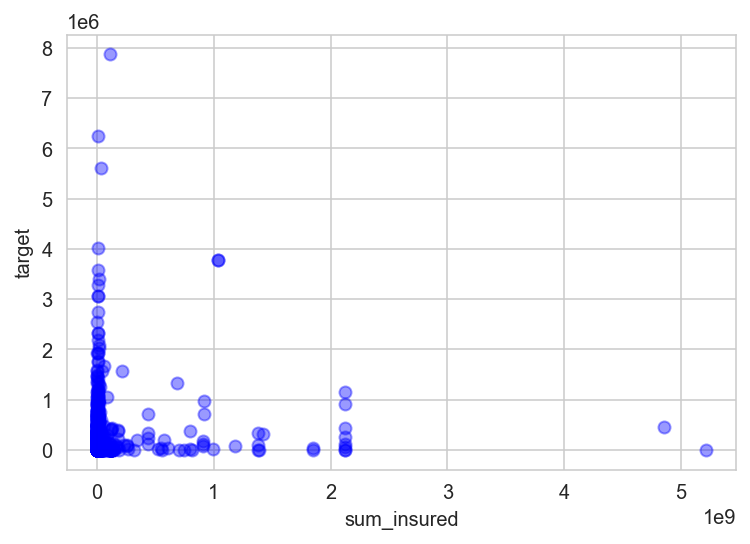

In [26]:
# Now lets visualise the numerical features
# What's the strength of other numerical features with the target using scatter plot

num_col = ['sum_insured']
def create_scatter(data, col, col_y = 'target', alpha = 0.4):
    for column in col:
        sns.set_style('whitegrid')
        print('The scatter relationship between ' + col_y + ' vs. ' + column)
        sns.regplot(column, col_y, data, 
            scatter_kws = {'alpha':alpha}, color = 'blue', fit_reg = False)
        plt.xlabel(column)
        plt.ylabel(col_y)
        plt.show()
        
create_scatter(train_data, num_col)

This confirm that eventhough there's a strong relationship between the two variables, there's an extreme outlier values for `target` and `sum_insured`

Let's further investigate the `target` and `sum_insured` using histogram plots 

The distribution curve of target


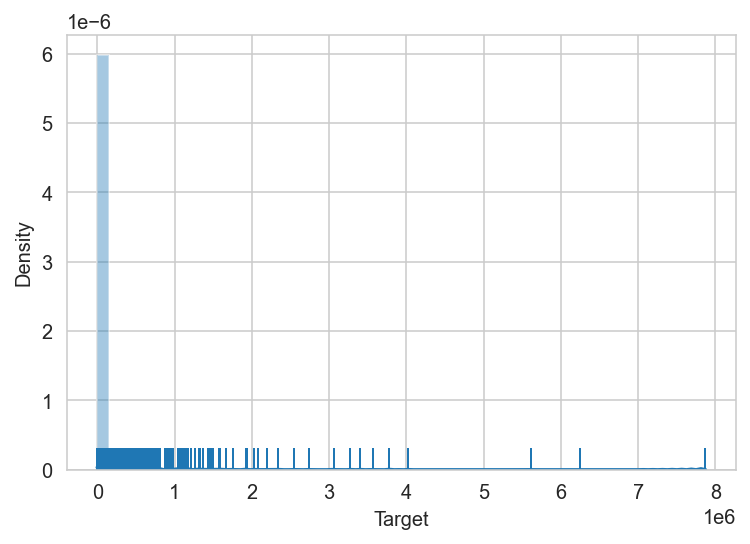

In [27]:
col = ['target']
def create_hist(data, col, hist = False, bins = 30):
    for column in col:
        print('The distribution curve of ' + column)
        sns.set_style('whitegrid')
        sns.distplot(data[column], rug = True, hist = hist)
        plt.ylabel('Density')
        plt.xlabel(column.title())
        plt.show()
create_hist(train_data, col, hist = True)

Confirmed! Most of the target values are clustered in the 0-1.5e-6

## Data Preparation

1. Fill in missing category columns with vvalues that appear most
2. Changed `loss_date` to datetime and split it into day, month and year
3. Drop clolumns that **might** not help in prediction
4. Encode categorical data
5. Faeture se;ection toprevent overfitting 
5. Split data into train and validation set
6. Scale data
7. Train model and mopdel evaluation

In [28]:
# Convert categorical variables to categorical objects
cat_cols = train_data.columns.difference(['claim_id', 'loss_date', 'policy_number', 'claim_number', 'sum_insured', 'target']).tolist()

# Preview categorical variables
train_data[cat_cols].head()

,agent,branch,class_of_business,client_type,primary_cause,product,renewal_frequency,risk_type,secondary_cause
0,ag00068,br00006,cob00031,ct0003,pc0007,prod00027,rf0001,rt00006,sc00022
1,ag00226,br00002,cob00010,ct0003,pc0007,prod00005,rf0001,rt00032,sc00023
2,ag00037,br00002,cob00010,ct0003,pc0007,prod00029,rf0001,rt00026,sc00024
3,ag00037,br00001,cob00009,ct0003,pc0007,prod00005,rf0001,rt00032,sc00021
4,ag00226,br00001,cob00034,ct0001,pc0007,prod00015,rf0001,rt00023,sc00021


In [29]:
# Fill in missing values in categorical variables with the most common
train_data[cat_cols] = train_data[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
    train_data[col] = train_data[col].astype('category')

# Confirm the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   claim_id           9376 non-null   object  
 1   policy_number      9290 non-null   object  
 2   claim_number       9376 non-null   object  
 3   sum_insured        9376 non-null   float64 
 4   product            9376 non-null   category
 5   agent              9376 non-null   category
 6   class_of_business  9376 non-null   category
 7   risk_type          9376 non-null   category
 8   loss_date          9376 non-null   object  
 9   client_type        9376 non-null   category
 10  renewal_frequency  9376 non-null   category
 11  primary_cause      9376 non-null   category
 12  secondary_cause    9376 non-null   category
 13  branch             9376 non-null   category
 14  target             9376 non-null   float64 
dtypes: category(9), float64(2), object(4)
memory usage: 532

## Feature Engineering

Some category are extremely small, hence we'll feature engineer them

In [30]:
#checking for categorical value counts

for c in cat_cols:
    print()
    print('The value counts of ' + c)
    print(train_data[c].sort_index().value_counts())


The value counts of agent
ag00037    3114
ag00226    2548
ag00068    2127
ag00064     885
ag00083     231
ag00021     231
ag00044     221
ag00080      19
Name: agent, dtype: int64

The value counts of branch
br00002    3900
br00001    3242
br00007     717
br00005     587
br00006     383
br00009     225
br00008     143
br00004     133
br00011      26
br00003      17
br00010       3
Name: branch, dtype: int64

The value counts of class_of_business
cob00034    3608
cob00009    2256
cob00031     817
cob00010     786
cob00022     331
cob00013     230
cob00016     199
cob00023     176
cob00004     136
cob00015     135
cob00026     134
cob00001     102
cob00036      84
cob00003      84
cob00033      59
cob00027      50
cob00012      43
cob00002      33
cob00021      19
cob00029      14
cob00024      10
cob00028       9
cob00035       9
cob00018       7
cob00007       7
cob00030       7
cob00011       6
cob00017       5
cob00008       4
cob00038       4
cob00006       3
cob00005       3
cob00

In [31]:

# cylinder_categories = {'three':'three_four', 'four':'three_four', 
#                     'five':'five_six', 'six':'five_six',
#                     'eight':'eight_twelve', 'twelve':'eight_twelve'}
# auto_prices['num_of_cylinders'] = [cylinder_categories[x] for x in auto_prices['num_of_cylinders']]
# auto_prices['num_of_cylinders'].value_counts()

## Data Preprocessing

In [32]:
train_data.loss_date = pd.to_datetime(train_data.loss_date, errors='coerce')
# Extract day, month and year from the loss date column
# day
train_data['loss_date_day'] = train_data.loss_date.dt.day

# month
train_data['loss_date_month'] = train_data.loss_date.dt.month
 
# year
train_data['loss_date_year'] = train_data.loss_date.dt.year

# Preview engineered date features
train_data[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()

,loss_date,loss_date_day,loss_date_month,loss_date_year
0,2021-05-13,13,5,2021
1,2018-05-13,13,5,2018
2,2018-08-18,18,8,2018
3,2018-12-20,20,12,2018
4,2018-11-07,7,11,2018


In [33]:
train_data.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,loss_date_day,loss_date_month,loss_date_year
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00,13,5,2021
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24,13,5,2018
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50,18,8,2018
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67,20,12,2018
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64,7,11,2018


In [34]:
#dropping the columns that may not help in the prediction exercise
train_data.drop(['loss_date', 'claim_id', 'policy_number', 'claim_number'], axis='columns', inplace=True)
train_data.head(2)

,sum_insured,product,agent,class_of_business,risk_type,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,loss_date_day,loss_date_month,loss_date_year
0,300000.0,prod00027,ag00068,cob00031,rt00006,ct0003,rf0001,pc0007,sc00022,br00006,82150.00,13,5,2021
1,16000.0,prod00005,ag00226,cob00010,rt00032,ct0003,rf0001,pc0007,sc00023,br00002,3780.24,13,5,2018


In [35]:
train_data.isnull().sum().any()

False

In [36]:
train_ = train_data.copy()

In [37]:
train_.dtypes

sum_insured           float64
product              category
agent                category
class_of_business    category
risk_type            category
client_type          category
renewal_frequency    category
primary_cause        category
secondary_cause      category
branch               category
target                float64
loss_date_day           int64
loss_date_month         int64
loss_date_year          int64
dtype: object

In [38]:
# from scipy import stats
# fitted_data, fitted_lambda = stats.boxcox(train_data['target'])
# train_data.box_target = fitted_data
# create_hist(train_data, ['box_target'], hist=True)



## Feature Transformation

In [39]:
num_col = ['sum_insured', 'loss_date_day', 'loss_date_month', 'loss_date_year']

In [40]:
cat = ['agent', 'class_of_business', 'risk_type', 'client_type',
      'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch']

def feature_encode(cat):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    # encode label
    enc = LabelEncoder()
    enc.fit(cat)
    encoded = enc.transform(cat)
    #one hot encoding 
    ohe = OneHotEncoder()
    ohe_encoded = ohe.fit(encoded.reshape(-1, 1))
    return ohe_encoded.transform(encoded.reshape(-1, 1)).toarray()

In [41]:
feature = feature_encode(train_data['product'])

for c in cat:
    encoded = feature_encode(train_data[c])
    temp = np.concatenate([feature, encoded], axis=1)
temp.shape

(9376, 48)

In [42]:
features = np.concatenate([temp, np.array(train_data[num_col])], axis=1)
features.shape

(9376, 52)

In [43]:
features[:1, :]

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+05, 1.300e+01, 5.000e+00, 2.021e+03]])

Now we have 48 dummy variables and 4 numeric variables

## Feature Selection

In [44]:
import sklearn.feature_selection as fs

# Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.9 * (1 - .9))) #Threshold of 90%
Features_reduced = sel.fit_transform(features)
print(Features_reduced.shape)

(9376, 9)


In [45]:
sel.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True])

In [46]:
Features_reduced[:1,:]

array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+05,
        1.300e+01, 5.000e+00, 2.021e+03]])

## Splitting data into training and test set

In [47]:
# Splitting the data into features and labels using bernoulli sampling;
# and splitting the data

np.random.seed(9988)
from sklearn.model_selection import train_test_split  
labels = np.array(train_data['target'])
index = range(Features_reduced.shape[0])
index = train_test_split(index, test_size = 2000)
train_features = Features_reduced[index[0], :] # 
train_label = np.ravel(labels[index[0]])
val_features = Features_reduced[index[1], :]
val_label = np.ravel(labels[index[1]])

In [48]:
train_features.shape, train_label.shape, val_features.shape, val_label.shape

((7376, 9), (7376,), (2000, 9), (2000,))

In [49]:
## Here we'll be using the z-score normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_features[:, 5:])
train_features[:, 5:] = scaler.transform(train_features[:, 5:])
val_features[:, 5:] = scaler.transform(val_features[:, 5:])

print(train_features.shape)
print(train_label.shape)
print(train_features[:1,:])

(7376, 9)
(7376,)
[[ 0.          0.          0.          0.          0.         -0.07471349
   0.49629041  0.5306067   0.07263115]]


## Train a model

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from numpy.random import seed

np.random.seed(9988)

model = ExtraTreesRegressor(max_depth=3, criterion='mae', n_estimators=65, n_jobs=-1, 
                            min_samples_leaf=3, min_samples_split=5, verbose=1, random_state=42)

In [51]:
# model = GradientBoostingRegressor(criterion='mae', max_depth=4,
#                               min_samples_split=0.2)

In [52]:
# params = {'n_estimators': [25, 50, 75, 100],
#          'max_features': ['auto', 'sqrt', 'log2'],
#           'min_samples_split' :[2, 4, 6],
#           'min_samples_leaf': [1, 3, 6]
#          }

# fold = KFold(n_splits=10)
# cv = GridSearchCV(estimator=model, param_grid=params, cv=fold)

In [53]:
model.fit(train_features, train_label)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:   54.0s finished


ExtraTreesRegressor(criterion='mae', max_depth=3, min_samples_leaf=3,
                    min_samples_split=5, n_estimators=65, n_jobs=-1,
                    random_state=42, verbose=1)

In [54]:
prediction = model.predict(val_features)
print('The Mean absolute error = ', mean_absolute_error(val_label, prediction))

The Mean absolute error =  32341.167826076922


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  65 out of  65 | elapsed:    0.0s finished


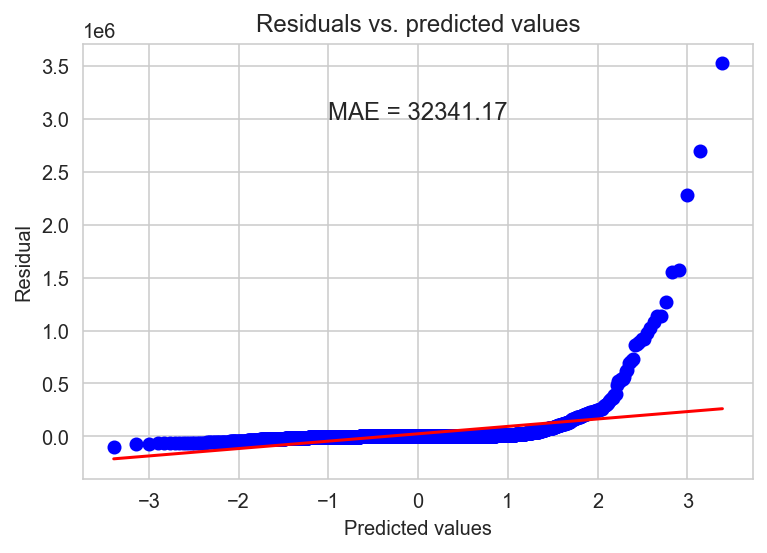

In [80]:
import scipy.stats as ss
def resid_qq(y_val, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_val.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.text(-1, 3e6, 'MAE = ' + round(mean_absolute_error(val_label, prediction), 2).astype(str), fontsize=12)
    plt.ylabel('Residual')
    plt.savefig('model.png')
    
resid_qq(val_label, prediction)  

## Making prediction on test set


   1. Fill in missing category columns with vvalues that appear most
   2. Changed loss_date to datetime and split it into day, month and year
   3. Drop clolumns that might not help in prediction
   4. Encode categorical data
   5. Faeture selection to prevent overfitting
   6. Split data into train and validation set
   7. Scale data
   8. Train model and mopdel evaluation



In [56]:
#preprocessing the testdata
test_data.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.0,prod00005,ag00068,cob00009,rt00032,2021-03-11,ct0003,rf0001,pc0007,sc00029,br00004
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.0,prod00015,ag00064,cob00034,rt00023,2020-06-25,ct0001,rf0003,pc0007,sc00022,br00002
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.0,prod00012,ag00021,cob00016,rt00015,2019-03-14,ct0001,rf0001,pc0011,sc00049,br00001
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.0,prod00002,ag00037,cob00002,rt00002,2018-12-04,ct0001,rf0002,pc0002,sc00012,br00005
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.0,prod00015,ag00037,cob00034,rt00023,2019-09-18,ct0001,rf0003,pc0007,sc00022,br00002


In [57]:
test_data.isnull().sum().any()

True

In [58]:
test_data.isnull().sum()

claim_id              0
policy_number        41
claim_number          0
sum_insured           0
product               0
agent                 0
class_of_business     0
risk_type             0
loss_date             0
client_type           0
renewal_frequency     0
primary_cause         0
secondary_cause       0
branch                0
dtype: int64

In [59]:
print(num_col)
print(cat_cols)

['sum_insured', 'loss_date_day', 'loss_date_month', 'loss_date_year']
['agent', 'branch', 'class_of_business', 'client_type', 'primary_cause', 'product', 'renewal_frequency', 'risk_type', 'secondary_cause']


In [60]:
for c in cat_cols:
    print()
    print('The values in ' + c)
    print(test_data[c].value_counts())


The values in agent
ag00037    1319
ag00226    1125
ag00068     926
ag00064     377
ag00044      96
ag00021      89
ag00083      78
ag00080       9
Name: agent, dtype: int64

The values in branch
br00002    1674
br00001    1385
br00007     320
br00005     233
br00006     154
br00009      99
br00008      69
br00004      66
br00011      13
br00003       5
br00010       1
Name: branch, dtype: int64

The values in class_of_business
cob00034    1622
cob00009     947
cob00031     329
cob00010     317
cob00022     166
cob00016     104
cob00013      79
cob00023      70
cob00004      62
cob00015      57
cob00026      51
cob00036      41
cob00001      40
cob00003      35
cob00033      20
cob00027      19
cob00012      16
cob00002      11
cob00028       6
cob00029       5
cob00021       5
cob00038       2
cob00011       2
cob00005       2
cob00024       2
cob00007       2
cob00030       1
cob00037       1
cob00008       1
cob00006       1
cob00017       1
cob00035       1
cob00018       1
Name: 

In [61]:
# Fill in missing values in categorical variables with the most common
test_data[cat_cols] = test_data[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert datetime variables to datetime objects
test_data.loss_date = pd.to_datetime(test_data.loss_date, errors='coerce')

# Convert
for col in cat_cols:
    test_data[col] = test_data[col].astype('category')

# Extract day, month and year from the loss date column
test_data['loss_date_day'] = test_data.loss_date.dt.day #day

test_data['loss_date_month'] = test_data.loss_date.dt.month #month
 
test_data['loss_date_year'] = test_data.loss_date.dt.year #year

test_data.drop(['claim_id', 'policy_number', 'claim_number', 'loss_date'], inplace=True, axis='columns')


print(test_data.dtypes)

sum_insured           float64
product              category
agent                category
class_of_business    category
risk_type            category
client_type          category
renewal_frequency    category
primary_cause        category
secondary_cause      category
branch               category
loss_date_day           int64
loss_date_month         int64
loss_date_year          int64
dtype: object


In [62]:
test_data.head(1)

,sum_insured,product,agent,class_of_business,risk_type,client_type,renewal_frequency,primary_cause,secondary_cause,branch,loss_date_day,loss_date_month,loss_date_year
0,300000.0,prod00005,ag00068,cob00009,rt00032,ct0003,rf0001,pc0007,sc00029,br00004,11,3,2021


In [63]:
test_data.shape

(4019, 13)

In [64]:
# Label encode categorical variables
test_feature = feature_encode(test_data['product'])

for c in cat:
    encoded = feature_encode(test_data[c])
    temp = np.concatenate([test_feature, encoded], axis=1)

test_features = np.concatenate([temp, np.array(test_data[num_col])], axis=1)


# Preview engineered test dataset
test_features.shape

(4019, 49)

In [65]:
test_features[:1,:]

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+05, 1.100e+01, 3.000e+00,
        2.021e+03]])

In [66]:
# Define the variance threhold and fit the threshold to the feature array. 
# sel = fs.VarianceThreshold(threshold=(.9 * (1 - .9))) #Threshold of 90%
Test_Features_reduced = sel.fit_transform(test_features)
print(Test_Features_reduced.shape)

(4019, 9)


In [67]:
test_data = StandardScaler().fit_transform(Test_Features_reduced)

In [68]:
test_data[:1,:]

array([[ 1.98733676, -0.9659922 , -0.33705323, -0.72513188, -0.84490193,
        -0.05923867, -0.53791104, -0.95887954,  1.9918915 ]])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  65 out of  65 | elapsed:    0.0s finished


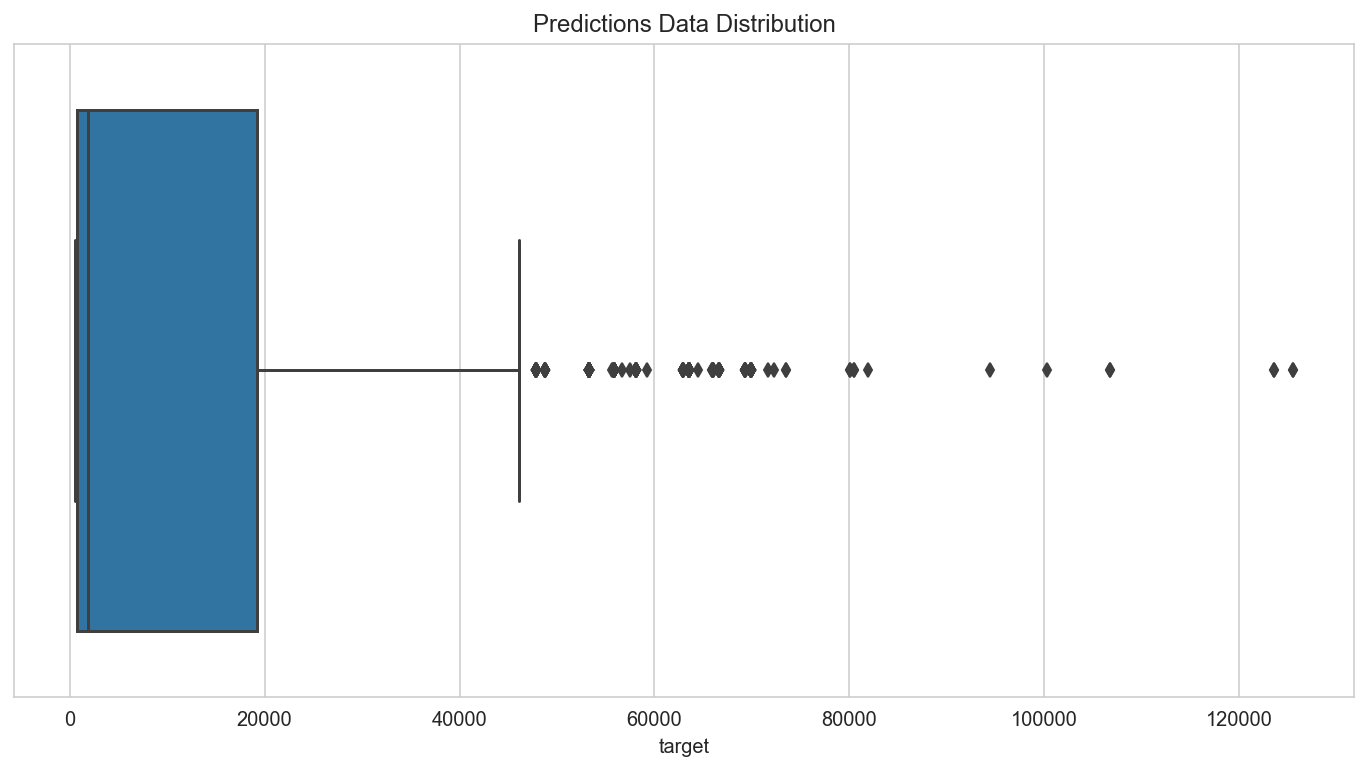

In [69]:
np.random.seed(9988)
predictions = model.predict(test_data)

# # Create a submission file
sub_file = sample_submission.copy()
sub_file.target = predictions

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file.target)
plt.title('Predictions Data Distribution');

In [70]:
sub_file.head(30)

,claim_id,target
0,ID_4RO0KZI9BBW2,80023.506846
1,ID_GTE9ZUJ9GZ97,21596.948385
2,ID_RUVIYRKWZ4RG,2006.313538
3,ID_J81X8SWU6JYN,566.978769
4,ID_94NM3JJAWWOQ,3091.203538
5,ID_TKCNGKSO1CMY,1755.477077
6,ID_T1HVS684BH5I,1755.477077
7,ID_T8UW9ST7U75S,700.867385
8,ID_MPCPOYBXBDQ9,700.867385
9,ID_PTR3D1Y4HKCO,700.867385


In [71]:
# Write to csv file to submit to Zindi
sub_file.to_csv("Submission.csv", index = False)